<a href="https://colab.research.google.com/github/davidchoque-01/api-cursos/blob/main/A%CC%81rboles_de_Decisio%CC%81n_Explicaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arboles de Decisión

## Entropía

$$
E(S) = \sum_{i=1}^{n} -p_i log_2 p_i
$$

Analizando una variable binaria:
Consideremos que $P = (p, 1-p)$, la entropía es dada por: E = -p log(p) - (1-p)log (1-p)

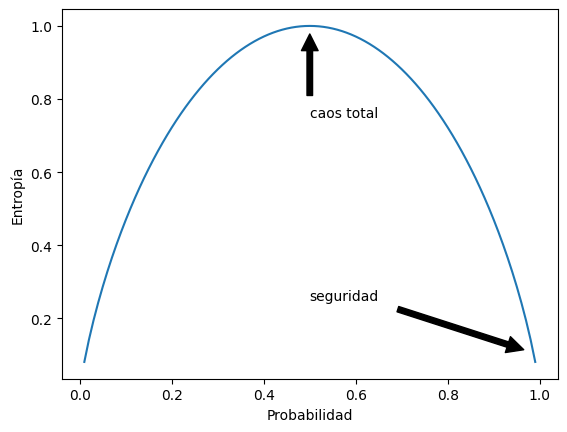

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
p = np.arange(0.01,1.0,0.01)
plt.xlabel('Probabilidad')
plt.ylabel('Entropía')

plt.annotate('caos total', xy=(0.5,1), xytext=(0.5,0.75),
             arrowprops = dict(facecolor='black', shrink=0.1))
plt.annotate('seguridad', xy=(1,0.1), xytext=(0.5,0.25),
             arrowprops = dict(facecolor='black', shrink=0.1))
#Probabilidad
x = p
#Entropía
y = -p*np.log2(p) - (1-p)*np.log2(1-p)

plt.plot(x,y);

## Ganancia de la Información
$$
G(S,A) = Entropia(S) - \sum_{v\in V(A)} \frac{|S_v|}{|S|} Entropia(S_v)
$$

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
df = pd.read_csv(io.BytesIO(subido['notas.csv']), sep=';')

Saving notas.csv to notas.csv


In [ ]:
df.head(7)

,Asistencia,Participacion,Aprovechamiento,Nota
0,No asiste,Media,Excelente,Exento
1,Asiste,Alta,Bueno,Exento
2,No asiste,Media,Bueno,Final
3,No asiste,Baja,Bueno,Final
4,Asiste,Alta,Regular,Final
5,Asiste,Baja,Deficiente,Extraordinario
6,No asiste,Media,Regular,Extraordinario


### Calcular la entropía de la variable clase: Nota

$Nota = \{Exento, Final, Extraordinario\}$

$$
E(Nota) = E(Nota=Exento) + E(Nota=Final) + E(Nota=Extraordinario)
$$


$$
E(Nota = Exento) = -p(Nota=Exento)\times log_2 p(Nota=Exento)
$$

In [ ]:
import math
def log2(p):
  return math.log2(p)

E_nota_exento = -(2/7)*log2(2/7)
print(E_nota_exento)

E_nota_final = -(3/7)*log2(3/7)
print(E_nota_final)

E_nota_extraordinario = -(2/7)*log2(2/7)
print(E_nota_extraordinario)

0.5163871205878868
0.5238824662870492
0.5163871205878868


In [ ]:
E_nota = E_nota_exento + E_nota_final + E_nota_extraordinario
print(E_nota)

1.5566567074628228


### Calcular la Ganancia de la Información con: Punt. asistentcia respecto a la Nota

$$
G(S,A) = Entropia(S) - \sum_{v\in V(A)} \frac{|S_v|}{|S|} Entropia(S_v)
$$

Asumismos que **Punt.asist** es **P**:
$$
G(P) = Entropia(Nota) - (  suma )
$$

$$
suma = -\frac{M[P=\text{No asiste}]}{M} \times E(P=\text{No asiste}, Nota) -\frac{M[P=Asiste]}{M} \times E(P=Asiste, Nota)
$$


$$
E(P=\text{No asiste},Nota) = -\frac{M[no, exento]}{M[no]}\times log_2 \frac{M[no, exento]}{M[no]} -\frac{M[no, final]}{M[no]}\times log_2 \frac{M[no, final]}{M[no]} -\frac{M[no, extraordinario]}{M[no]}\times log_2 \frac{M[no, extraordinario]}{M[no]}
$$

In [ ]:
E_asistencia_no = -(1/4)*log2(1/4) - (2/4)*log2(2/4) - (1/4)*log2(1/4)
print("E_asistencia_no:",E_asistencia_no)

E_asistencia_no: 1.5


In [ ]:
E_asistencia_si = -(1/3)*log2(1/3) - (1/3)*log2(1/3) - (1/3)*log2(1/3)
print("E_asistencia_si:", E_asistencia_si)

E_asistencia_si: 1.584962500721156


In [ ]:
G_asistencia = E_nota - ((4/7)*E_asistencia_no + (3/7)*E_asistencia_si)
print("G_asistencia: ", G_asistencia)

G_asistencia:  0.020244207153755855


In [ ]:
tam = df.shape
print(tam)

(7, 4)


In [ ]:
instancias = df.shape[0]
columnas = df.shape[1]
print(instancias)
print(columnas)

7
4


In [ ]:
def calcular_entropia(df, instancias, clase):
  entropia = 0
  clases = df[clase].value_counts().keys().tolist()
  for i in range(0, len(clases)):
    prob = df.iloc[:,-1].value_counts().tolist()[i]/instancias
    entropia += -prob*log2(prob)
  return entropia

In [ ]:
#Programa principal
calcular_entropia(df, instancias, "Nota")

1.5566567074628228

In [ ]:
def ganancia_informacion(df, clase):
  ganancias = []
  for i in range(0, columnas-1):
    nombre_atributo = df.columns[i]
    valores_atributo = df[nombre_atributo].value_counts()
    ganancia = entropia_nota

    for j in range(0,len(valores_atributo)):
      valor_actual = valores_atributo.keys().tolist()[j]
      subdata = df[df[nombre_atributo]==valor_actual]
      #print(subdata)
      subdata_instancias = subdata.shape[0]
      subdata_entropia = calcular_entropia(subdata, subdata_instancias, clase)
      valor_probabilidad = subdata_instancias/instancias
      ganancia = ganancia -valor_probabilidad*subdata_entropia
    ganancias.append(ganancia)
  #print(ganancias)
  #maximo = max(ganancias)
  #print("Max:",maximo)
  ganancia_mayor = ganancias.index(max(ganancias))
  nombre_mejor_ganancia = df.columns[ganancia_mayor]
  #print("nombre_mejor_ganancia: ", nombre_mejor_ganancia)
  return nombre_mejor_ganancia


In [ ]:
entropia_nota = calcular_entropia(df, instancias, "Nota")
print(entropia_nota)

nombre_mejor = ganancia_informacion(df, "Nota")
print(nombre_mejor)

1.5566567074628228
Aprovechamiento


In [ ]:
print(instancias)

7


ID3 (Iterative Dichotomiser 3):

In [ ]:
def construccion_arbol(df, precondicion, clase):
  decision = ganancia_informacion(df, clase)
  atributos_decision = df[decision].value_counts().keys().tolist()
  for i in range(len(atributos_decision)):
    atributo_actual = atributos_decision[i]
    subdata = df[df[decision]==atributo_actual]
    subdata = subdata.drop(columns=decision)

    if len(subdata.iloc[:,-1].value_counts().tolist())==1 :
      decision_final = subdata.iloc[:,-1].value_counts().keys().tolist()[0]
      print(precondicion, "Si ", decision, " es ", atributo_actual, " la respuesta es: ", decision_final)
    else:
      precondicion = str(precondicion) + " Si " + str(decision) + " es " + str(atributo_actual) + " y "
      construccion_arbol(subdata, precondicion, clase)
      precondicion = ""


In [ ]:
construccion_arbol(df, "", "Nota")

 Si Aprovechamiento es Bueno y  Si  Asistencia  es  No asiste  la respuesta es:  Final
 Si Aprovechamiento es Bueno y  Si  Asistencia  es  Asiste  la respuesta es:  Exento
 Si Aprovechamiento es Regular y  Si  Asistencia  es  Asiste  la respuesta es:  Final
 Si Aprovechamiento es Regular y  Si  Asistencia  es  No asiste  la respuesta es:  Extraordinario
 Si  Aprovechamiento  es  Excelente  la respuesta es:  Exento
 Si  Aprovechamiento  es  Deficiente  la respuesta es:  Extraordinario


# Probando lo mismo que lo anterior pero ahora con el dataset IRIS

In [ ]:
import pandas as pd
from google.colab import files
subido = files.upload()
import io
df = pd.read_csv(io.BytesIO(subido['iris.csv']), sep=',')

Saving iris.csv to iris.csv


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
instancias = df.shape[0]
columnas = df.shape[1]
print(instancias)
print(columnas)
clase = "variety"

150
5


In [ ]:
#Programa principal
calcular_entropia(df, instancias, clase)

1.584962500721156

In [ ]:
construccion_arbol(df, "", clase)

 Si  petal.length  es  1.4  la respuesta es:  Setosa
 Si  petal.length  es  1.5  la respuesta es:  Setosa
 Si petal.length es 4.5 y  Si  sepal.length  es  6.0  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  5.7  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  6.4  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  5.6  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  6.2  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  5.4  la respuesta es:  Versicolor
 Si petal.length es 4.5 y  Si  sepal.length  es  4.9  la respuesta es:  Virginica
 Si petal.length es 5.1 y  Si  sepal.length  es  5.8  la respuesta es:  Virginica
 Si petal.length es 5.1 y  Si  sepal.length  es  6.0  la respuesta es:  Versicolor
 Si petal.length es 5.1 y  Si  sepal.length  es  6.5  la respuesta es:  Virginica
 Si petal.length es 5.1 y  Si  sepal.length  es  6.3  la respuesta 

El problema del ID3 es que es más útil para valores categóricos que para datos continuos.

# Algoritmo C4.5 para trabajar con valores continuos

- Splitinfo: información asociada al split
- Gainratio: comúnmente usado para datos continuos en vez de Ganancia de la Información
- Aplicable con valores continuos

In [ ]:
import math
def log2(p):
  return math.log(p,2)

In [ ]:
def calcular_entropia(df):
    instancias = df.shape[0]########
    entropia = 0
    clases = df.iloc[:,-1].value_counts().keys().tolist()

    for i in range(0, len(clases)):

        probabilidad_clase = df.iloc[:,-1].value_counts().tolist()[i]/instancias
        #print( probabilidad_clase)
        entropia = entropia - probabilidad_clase*math.log(probabilidad_clase, 2)
        #print("entropiaa:",entropia)


    return entropia

In [ ]:
def datos_continuos(df,nombre_atributo, entropia):
    valores_unicos = sorted(df[nombre_atributo].unique()) ############
    ganancias_continuos = []

    for i in range(0, len(valores_unicos)-1):
        rango = valores_unicos[i]

        subdata1 = df[df[nombre_atributo] <= rango]
        subdata2 = df[df[nombre_atributo] > rango]

        subdata1_instancias = subdata1.shape[0]
        subdata2_instancias = subdata2.shape[0]
        instancias = df.shape[0]

        subdata1_probabilidad = subdata1_instancias/instancias
        subdata2_probabilidad = subdata2_instancias/instancias

        rango_ganancia = entropia - subdata1_probabilidad*calcular_entropia(subdata1) - subdata2_probabilidad*calcular_entropia(subdata2)

        rango_split = -subdata1_probabilidad * math.log(subdata1_probabilidad, 2) - subdata2_probabilidad*math.log(subdata2_probabilidad, 2)########

        ganancia_ratio = rango_ganancia/rango_split
        ganancias_continuos.append(ganancia_ratio)

    maxima_ganancia = ganancias_continuos.index(max(ganancias_continuos))
    gananacia_mayorc = valores_unicos[maxima_ganancia]
    #print("ganador",gananacia_mayorc,"atributo",nombre_atributo)
    df[nombre_atributo] = np.where(df[nombre_atributo] <= gananacia_mayorc, "<="+str(gananacia_mayorc), ">"+str(gananacia_mayorc))

    return df

In [ ]:
def ganancia_informacion(df):
    entropia= calcular_entropia(df)####
    ganancias = []
    ganancias_ratio = []
    columnas = df.shape[1]####
    instancias = df.shape[0]#####


    for i in range(0,columnas-1):
        nombre_atributo = df.columns[i]
        tipo_atributo = df[nombre_atributo].dtypes
        if tipo_atributo != "object":#####
            df = datos_continuos(df, nombre_atributo, entropia)

        clases_atributo = df[nombre_atributo].value_counts()
        ganancia = entropia
        split = 0



        #print("nombre",nombre_atributo,"tipo",tipo_atributo)



        for j in range(0,len(clases_atributo)):
            clase_actual = clases_atributo.keys().tolist()[j]
            #print("clase_actual: ",clase_actual)

            subdata = df[df[nombre_atributo] == clase_actual]
            #print("\n", subdata)
            subdata_entropia = calcular_entropia(subdata)####

            #print(subdata_entropia)
            subdata_instancias = subdata.shape[0]

            clase_a_probabilidad = subdata_instancias/instancias
            ganancia = ganancia - clase_a_probabilidad*subdata_entropia

            split = split-clase_a_probabilidad*math.log(clase_a_probabilidad,2)


        ganancias.append(ganancia)

        gananciaratio = ganancia/split
        ganancias_ratio.append(gananciaratio)

    if algoritmo == "ID3":
        ganancia_mayor = ganancias.index(max(ganancias))
    elif algoritmo == "C4.5":
        ganancia_mayor = ganancias_ratio.index(max(ganancias_ratio))

    nombre_mejor_ganancia = df.columns[ganancia_mayor]
    #print("ganancias",ganancias)
    #print(nombre_mejor_ganancia)
    return nombre_mejor_ganancia


In [ ]:
def construccion_arbol(df, precondicion):
    df_copia = df.copy()######
    desicion = ganancia_informacion(df)
    columnas = df.shape[1]

    for i in range(0, columnas-1):########
        nombre_columna = df.columns[i]
        #print("nombre_columna")
        if nombre_columna != desicion:
            df[nombre_columna] = df_copia[nombre_columna]

    atributos_desicion = df[desicion].value_counts().keys().tolist()
    for i in range(0,len(atributos_desicion)):
        atributo_actual = atributos_desicion[i]
        subdata = df[df[desicion] == atributo_actual]
        subdata = subdata.drop(columns = [desicion])
        #print(subdata)

        if len(subdata.iloc[:,-1].value_counts().tolist()) == 1:
            desicion_final = subdata.iloc[:,-1].value_counts().keys().tolist()[0]
            print(precondicion," Si ",desicion," es ",atributo_actual," , la respuesta es", desicion_final)
        elif subdata.shape[1] == 1:#######################
            desicion_final = subdata.iloc[:,-1].value_counts().idxmax()
            print(precondicion," Si ",desicion," es ",atributo_actual," , la respuesta es", desicion_final)
        else:
            precondicion = str(precondicion)+" Si "+str(desicion)+" es "+str(atributo_actual)+" y "
            construccion_arbol(subdata, precondicion)
            precondicion = " "


In [ ]:
import pandas as pd
import math
import numpy as np
from google.colab import files
import io

In [ ]:
#subido = files.upload()
#df_iris = pd.read_csv(io.BytesIO(subido['iris.csv']), sep=',')
df_iris = pd.read_csv("iris.csv")

In [ ]:
algoritmo = "C4.5"
construccion_arbol(df_iris, "")

 Si petal.length es >1.9 y  Si petal.width es <=1.7 y  Si sepal.length es <=7.0 y   Si  sepal.width  es  <=2.8  , la respuesta es Versicolor
 Si petal.length es >1.9 y  Si petal.width es <=1.7 y  Si sepal.length es <=7.0 y   Si  sepal.width  es  >2.8  , la respuesta es Versicolor
   Si  sepal.length  es  >7.0  , la respuesta es Virginica
  Si petal.width es >1.7 y   Si  sepal.length  es  >5.9  , la respuesta es Virginica
  Si petal.width es >1.7 y  Si sepal.length es <=5.9 y   Si  sepal.width  es  <=3.0  , la respuesta es Virginica
  Si petal.width es >1.7 y  Si sepal.length es <=5.9 y   Si  sepal.width  es  >3.0  , la respuesta es Versicolor
   Si  petal.length  es  <=1.9  , la respuesta es Setosa
